### K-Mean Clustering
Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. K-Means falls under the category of centroid-based clustering. A centroid is a data point (imaginary or real) at the center of a cluster.
#### Inner-Working of K-Mean
Assume dataset:
<table>
    <tr>
        <th>Objects</th>
        <th>X</th>
        <th>Y</th>
        <th>Z</th>
    </tr>
    <tr>
        <td>OB-1</td>
        <td>1</td>
        <td>4</td>
        <td>1</td>
    </tr>
    <tr>
        <td>OB-2</td>
        <td>1</td>
        <td>2</td>
        <td>2</td>
      </tr>
      <tr>
        <td>OB-3</td>
        <td>1</td>
        <td>4</td>
        <td>2</td>
      </tr>
      <tr>
        <td>OB-4</td>
        <td>2</td>
        <td>1</td>
        <td>2</td>
      </tr>
      <tr>
        <td>OB-5</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
      </tr>
      <tr>
        <td>OB-6</td>
        <td>2</td>
        <td>4</td>
        <td>2</td>
      </tr>
      <tr>
        <td>OB-7</td>
        <td>1</td>
        <td>1</td>
        <td>2</td>
      </tr>
      <tr>
        <td>OB-8</td>
        <td>2</td>
        <td>1</td>
        <td>1</td>
      </tr>
</table>

So, the algorithm works by:
<ul>
    <li>Taking any two centroids or data points (as you took 2 as K hence the number of centroids also 2) in its account initially.</li>
    <li>After choosing the centroids, (say C1 and C2) the data points (coordinates here) are assigned to any of the Clusters (let’s take centroids = clusters for the time being) depending upon the distance between them and the centroids.</li>
    <li>Assume that the algorithm chose OB-2 (1,2,2) and OB-6 (2,4,2) as centroids and cluster 1 and cluster 2 as well.</li>
    <li>For measuring the distances, you take the following distance measurement function (also termed as similarity measurement function): <code>  d=|x2–x1|+|y2–y1|+|z2–z1|</code></li>
</ul>
Table of calculation of distances (using the above distance measurement function) between the objects and centroids (OB-2 and OB-6) will be:
<table>
  <tr>
    <th>Objects</th>
    <th>X</th>
    <th>Y</th>
    <th>Z</th>
    <th>Distance from C1(1,2,2)</th>
    <th>Distance from C2(2,4,2)</th>
  </tr>
  <tr>
    <td>OB-1</td>
    <td>1</td>
    <td>4</td>
    <td>1</td>
    <td>3</td>
    <td>2</td>
  </tr>
  <tr>
    <td>OB-2</td>
    <td>1</td>
    <td>2</td>
    <td>2</td>
    <td>0</td>
    <td>3</td>
  </tr>
  <tr>
    <td>OB-3</td>
    <td>1</td>
    <td>4</td>
    <td>2</td>
    <td>2</td>
    <td>1</td>
  </tr>
  <tr>
    <td>OB-4</td>
    <td>2</td>
    <td>1</td>
    <td>2</td>
    <td>2</td>
    <td>3</td>
  </tr>
  <tr>
    <td>OB-5</td>
    <td>1</td>
    <td>1</td>
    <td>1</td>
    <td>2</td>
    <td>5</td>
  </tr>
  <tr>
    <td>OB-6</td>
    <td>2</td>
    <td>4</td>
    <td>2</td>
    <td>3</td>
    <td>0</td>
  </tr>
  <tr>
    <td>OB-7</td>
    <td>1</td>
    <td>1</td>
    <td>2</td>
    <td>1</td>
    <td>4</td>
  </tr>
  <tr>
    <td>OB-8</td>
    <td>2</td>
    <td>1</td>
    <td>1</td>
    <td>3</td>
    <td>4</td>
  </tr>
</table>
An object which has a shorter distance between a centroid (say C1) than the other centroid (say C2) will fall into the cluster of C1. After the initial pass of clustering, the clustered objects will look something like the following:
<table>
  <tr><th>Cluster 1</th>
  </tr>
  <tr>
    <td>OB-2</td>
  </tr>
  <tr>
    <td>OB-4</td>
  </tr>
  <tr>
    <td>OB-5</td>
  </tr>
  <tr>
    <td>OB-7</td>
  </tr>
  <tr>
    <td>OB-8</td>
  </tr>
 </table><br />
 <table>
  <tr><th>Cluster 2</th>
  </tr>
  <tr>
    <td>OB-1</td>
  </tr>
  <tr>
    <td>OB-3</td>
  </tr>
  <tr>
    <td>OB-6</td>
  </tr>
</table>
After this, the algorithm again starts finding the distances between the data points and newly derived cluster centroids.

### The task is to cluster the Titanic's Passenger records into two i.e. the ones who survived and the ones who did not.
#### Install the Dependencies

In [1]:
!pip3 install sklearn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [3]:
!pip3 install matplotlib

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
!pip3 install seaborn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


#### Import Dependencies

In [5]:
# Dependencies

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Load and Visualize Dataset

In [10]:
# Load the train and test datasets to create two DataFrames

train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head(), "\n\n")

print("Column: ",train.columns.values)

***** Train_Set *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

It is very important to note that not all machine learning algorithms support missing values in the data that you are feeding to them. K-Means being one of them.
#### Handle Missing Value

In [11]:
#Get the missing value of both set

print("*****In the train set*****")
print(train.isna().sum())
print("\n")
print("*****In the test set*****")
print(test.isna().sum())

*****In the train set*****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*****In the test set*****
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


So, you can see in the training set, in the columns Age, Cabin and Embarked, there are missing values and in the test set, the Age and Cabin columns contain missing values.
We will handle the missing value by impute the missing value by:
<ul>
    <li>A constant value that has meaning within the domain, such as 0, distinct from all other values.</li>
    <li>A value from another randomly selected record.</li>
    <li>A mean, median or mode value for the column.</li>
    <li>A value estimated by another machine learning model.</li>
</ul>

In [12]:
# Fill missing values with mean column values in the train set
train.fillna(train.mean(), inplace=True)
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
# Fill missing values with mean column values in the test set
test.fillna(test.mean(), inplace=True)
print(test.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


You can see there are still some missing values in the Cabin and Embarked columns. This is because these values are non-numeric. 

#### Visualize Data
In order to understand the data better, we need to split the Feature into categorical and continuous
<ul>
    <li>Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.</li>
    <li>Continuous: Age, Fare. Discrete: SibSp, Parch</li>
</ul>
However there are 2 features left out: ticket and cabin because Ticket is a mix of numeric and alphanumeric data types and Cabin is alphanumeric.

In [18]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [17]:
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

Survival count of passengers with respect to the Pclass

In [19]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Survival count of passengers with respect to the Sex

In [21]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Survival count of passengers with respect to the Sibsp

In [22]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Plot of the graph of Survived VS Age

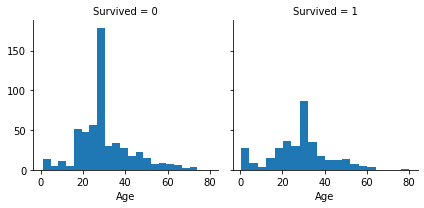

In [23]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Plot of the graph of Pclasses VS Survived

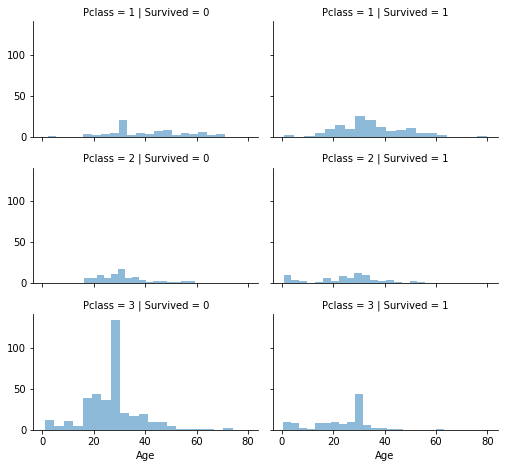

In [25]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

#### Build K-mean Model

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.3 KB


You can see that not all the feature values are of same type. Some of them are numerical and some of them are not. In order to ease the computation, you will feed all numerical data to the model. 

##### Drop some feature:
Some features like Name, Ticket, Cabin and Embarked do not have any impact on the survival status of the passengers. Often, it is better to train your model with only significant features than to train it with all the features, including unnecessary ones. Drop is better.

In [27]:
#Drop some data that isn't significant to be trained on our model
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

##### Label Encoding
Convert the 'Sex' feature to a numerical one (only 'Sex' is remaining now which is a non-numeric feature).

In [28]:
#convert "Sex" into the numerical order
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

In [29]:
#All data info of our dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.3 KB


In [31]:
#drop survival column
X = np.array(train.drop(['Survived'], 1).astype(float))
y = np.array(train['Survived'])

##### Our K-mean Model

In [32]:
#K-mean model
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
#see how well the model is doing by looking at the percentage of passenger records that were clustered correctly

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.49158249158249157


Not a grate performance from out model. In order to enhance the performance of the model you could tweak some parameters of the model itself such as:
<ul>
    <li>algorithm</li>
    <li>max_iter</li>
    <li>n_jobs</li>
</ul>

In [39]:
#add max_iter and algorithm parameter
kmeans = kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.49158249158249157


Same for the score because you have not scaled the values of the different features that you are feeding to the model. The features in the dataset contain different ranges of values.

In [41]:
#scale some data value
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6262626262626263


#### Disadvantage of K-Mean:
<ul>
    <li>K-Means requires you to pre-specify the number of clusters (k).</li>
    <li>K-means is that it is sensitive to outliers and different results can occur if you change the ordering of the data.</li>
</ul>